In [1]:
import numpy as np 
from Option import Option
from Dynamic_programming import DynamicPricing
from Monte_carlo import MonteCarlo_simulator
from Black_Scholes import black_scholes

# Geometric Brownian Motion

## Monte carlo Simulations

In [2]:
r = 0.05
sigma = 0.1
S0 = 100
L = 60
n =100
m = 50 
k=95

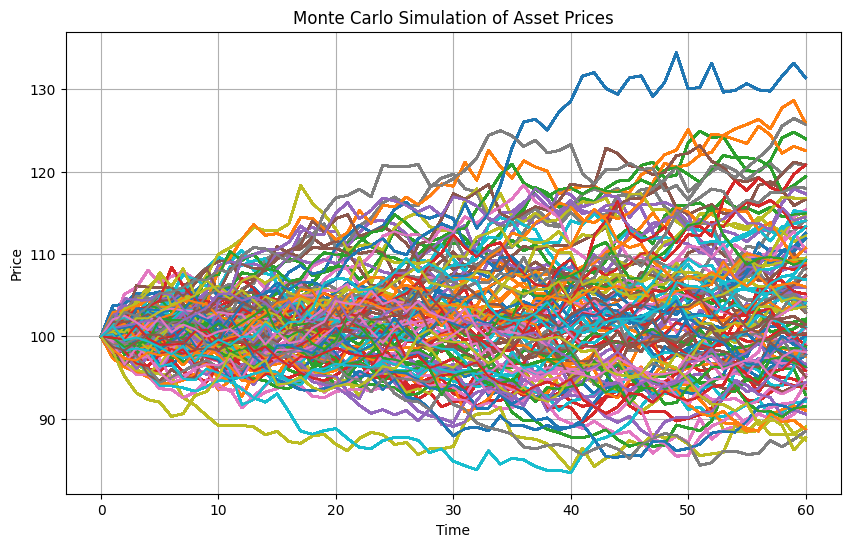

In [3]:
# Create Option object
call = Option(s0=S0, T=L, K=k, call=True)
payoff_0 = call.payoff(S0)

# Create instance of MonteCarlo_simulator
Simulation = MonteCarlo_simulator(S0, L, n,r=r,sigma=sigma,model_type="GBM")

# Visualize price simulation
Simulation.visualisation_price()

# Simulate payoff
price_simulation = Simulation.monte_carlo_price_simulator()
payoff_simulation = Simulation.monte_carlo_payoff_simulator(call.payoff,price_simulation)

## Dynamic Pricing

### Using Laguerre Basis

In [10]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 5.380538468949876
Dynamic Pricing: 5.113554117271297
Dynamic Pricing: 5.183750001820892
Dynamic Pricing: 5.356379150927061
Dynamic Pricing: 5.222673819745808


### Using Polynomial Basis

In [11]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'poly',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 5.137762239239027
Dynamic Pricing: 6.175783901704165
Dynamic Pricing: 5.20096815773132
Dynamic Pricing: 5.029974329694361
Dynamic Pricing: 5.336150603055881


## Comparaison of the results with European option price using Black Scholes 

In [7]:
p=black_scholes(S0, k, L, r, sigma, option_type='call')
print("The price of european option is ",p)

The price of european option is  5.901665492015354
